# Programa Ingenias+ Data Science

## ‚úèÔ∏è Ejercitaci√≥n: Procesamiento y transformaci√≥n de datos

Esta notebook les permitiria ejercitar los conceptos de Pandas üêº  y Procesamiento de datos üìä que aprendimos hasta ahora. Vamos a seguir trabajando con el dataset que contiene datos relativos a [clientes de un centro comercial](https://www.kaggle.com/akram24/mall-customers) que guardamos en la Notebook 10 luego de eliminar valores faltantes y filtrar outliers.

## ¬øQUE HACEMOS PRIMERO?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ruta_del_archivo = '/content/drive/My Drive/JUMP/Propuestas/Clase 14 - Clase pr√°ctica/clientes_mall.csv'

In [ ]:
df = pd.read_csv(ruta_del_archivo)

### 3. LEER LOS DATOS

In [ ]:
df

Unnamed: 0  CustomerID   Genre   Age  Annual Income (k$)  \
0             0         1.0    Male  19.0                15.0   
1             1         2.0     NaN  21.0                15.0   
2             2         3.0  Female  20.0                16.0   
3             3         4.0  Female  23.0                16.0   
4             4         5.0     NaN  31.0                17.0   
..          ...         ...     ...   ...                 ...   
195         195       196.0     NaN  35.0               120.0   
196         196       197.0  Female  45.0               126.0   
197         197       198.0    Male  32.0               126.0   
198         198       199.0    Male  32.0               137.0   
199         199       200.0    Male  30.0               137.0   

     Spending Score (1-100)  
0                      39.0  
1                      81.0  
2                       6.0  
3                      77.0  
4                      40.0  
..                      ...  
195                    79.0  
196                    28.0  
197                    74.0  
198                    18.0  
199                    83.0  

[200 rows x 6 columns]

In [ ]:
df.shape

(200, 6)

Este df cuenta con ... columnas y ... filas
Adem√°s podemos notar que....

In [ ]:
filas, columnas = df.shape
print(f"El dataset tiene {filas} filas y {columnas} columnas.")

El dataset tiene 200 filas y 6 columnas.


In [ ]:
df.dtypes

Unnamed: 0                  int64
CustomerID                float64
Genre                      object
Age                       float64
Annual Income (k$)        float64
Spending Score (1-100)    float64
dtype: object

ESTE ES UN DATASET

In [ ]:
df.columns = ['Sin Nombre', 'CustomerID', 'Genre', 'Age', 'Income', 'Spending_Score']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sin Nombre      200 non-null    int64  
 1   CustomerID      189 non-null    float64
 2   Genre           186 non-null    object 
 3   Age             189 non-null    float64
 4   Income          185 non-null    float64
 5   Spending_Score  186 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [ ]:
valores_faltantes = df.isna().sum()
valores_faltantes

Sin Nombre         0
CustomerID        11
Genre             14
Age               11
Income            15
Spending_Score    14
dtype: int64

In [ ]:
total_filas = len(df)

porcentaje = (valores_faltantes / total_filas) * 100
print(porcentaje)

Sin Nombre        0.0
CustomerID        5.5
Genre             7.0
Age               5.5
Income            7.5
Spending_Score    7.0
dtype: float64


In [ ]:
# Resumen Estad√≠stico Descriptivo
print("Resumen Estad√≠stico Descriptivo:")
print(df.describe())

Resumen Estad√≠stico Descriptivo:
       Sin Nombre  CustomerID         Age      Income  Spending_Score
count  200.000000  189.000000  189.000000  185.000000      186.000000
mean    99.500000  100.063492   38.888889   60.362162       49.924731
std     57.879185   57.507874   13.907878   26.267927       25.844540
min      0.000000    1.000000   18.000000   15.000000        1.000000
25%     49.750000   51.000000   29.000000   42.000000       32.500000
50%     99.500000  100.000000   36.000000   61.000000       49.000000
75%    149.250000  149.000000   49.000000   78.000000       72.750000
max    199.000000  200.000000   70.000000  137.000000       99.000000


La edad promedio de los clientes es de aproximadamente 38.89 a√±os, mientras que la mediana es de 36 a√±os, lo que indica que la distribuci√≥n de edad es ligeramente asim√©trica hacia edades mayores.


 La edad m√≠nima es de 18 a√±os y la m√°xima es de 70 a√±os. Esto sugiere que la muestra incluye tanto adultos j√≥venes como personas mayores.

---

 El ingreso promedio es de aproximadamente 60,362.16, mientras que la mediana es de 61,000. Esto sugiere que los ingresos est√°n bastante equilibrados en torno a la media.

 El ingreso var√≠a de 15,000 a 137,000. Este amplio rango indica una diversidad considerable en el nivel de ingresos de los clientes.

 ---



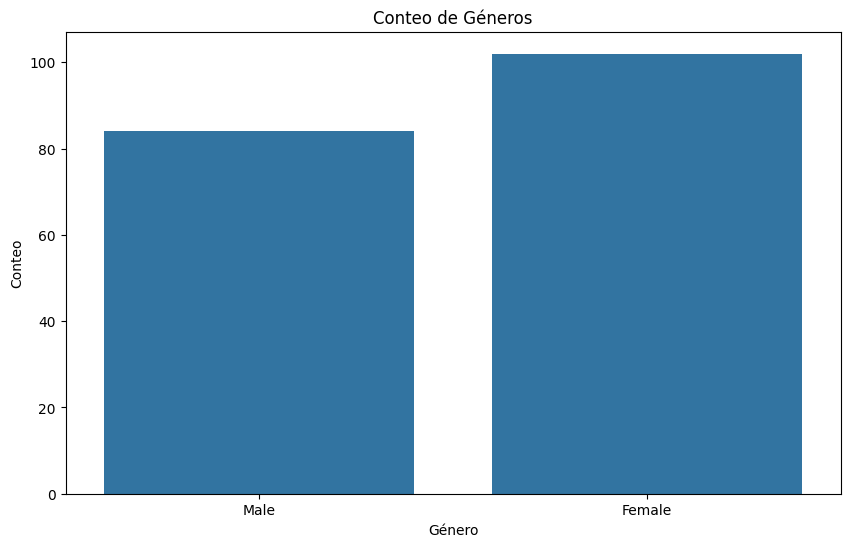

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Genre', data=df)
plt.title('Conteo de G√©neros')
plt.xlabel('G√©nero')
plt.ylabel('Conteo')
plt.show()

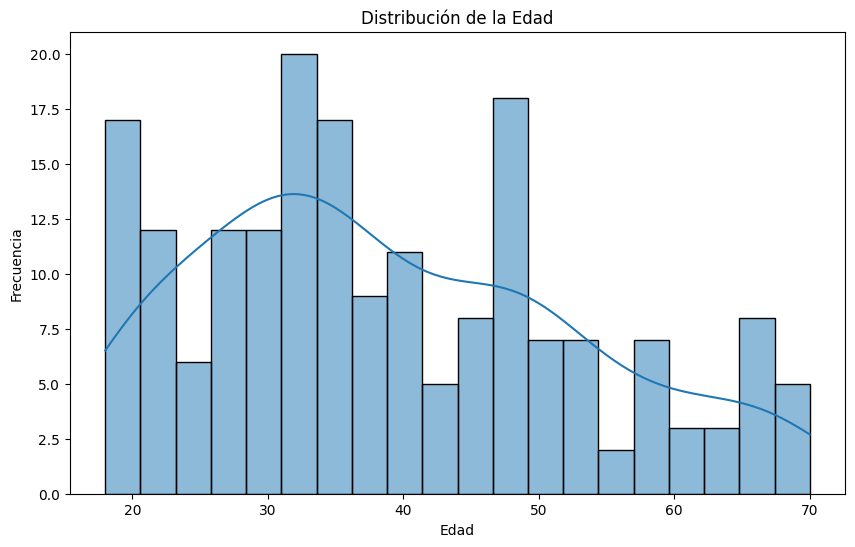

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title('Distribuci√≥n de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


ESTE GRAFICO ME MUESTRA que hay una disperi

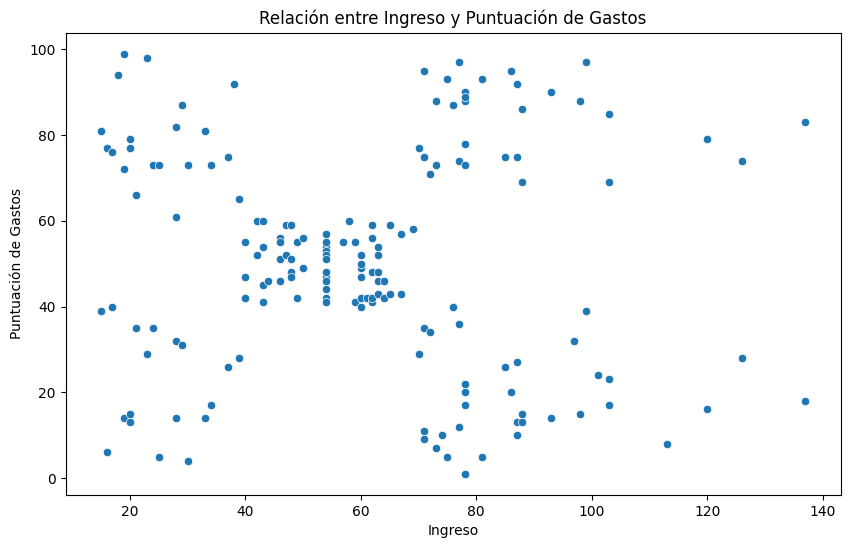

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Spending_Score', data=df)
plt.title('Relaci√≥n entre Ingreso y Puntuaci√≥n de Gastos')
plt.xlabel('Ingreso')
plt.ylabel('Puntuaci√≥n de Gastos')
plt.show()

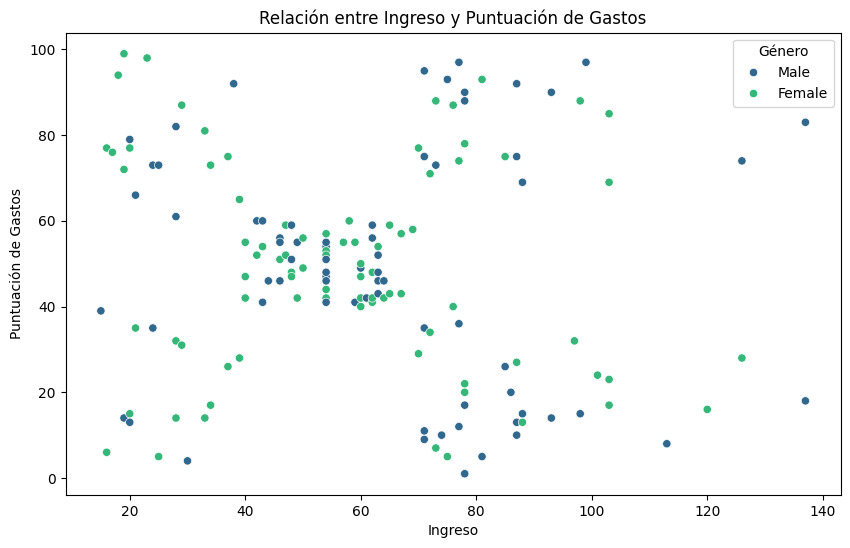

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Spending_Score', hue='Genre', data=df, palette='viridis')
plt.title('Relaci√≥n entre Ingreso y Puntuaci√≥n de Gastos')
plt.xlabel('Ingreso')
plt.ylabel('Puntuaci√≥n de Gastos')
plt.legend(title='G√©nero')
plt.show()

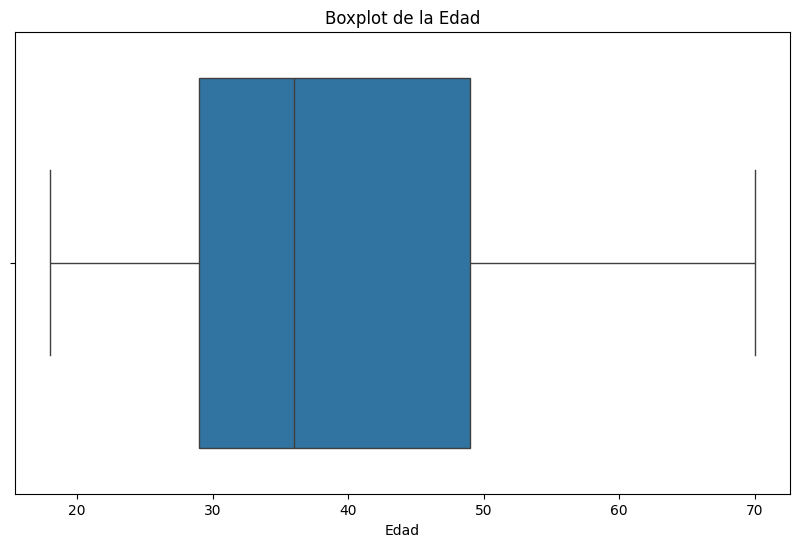

In [ ]:
# Boxplots para detectar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', data=df)
plt.title('Boxplot de la Edad')
plt.xlabel('Edad')
plt.show()

In [ ]:
# Matriz de Correlaci√≥n
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlaci√≥n')
plt.show()

ValueError: could not convert string to float: 'Male'

MARKETING: La mayor√≠a de los clientes tienen edades que se concentran alrededor de los 30-40 a√±os

DIVERSIDAD DE INGRESOS EN CLIENTES

HAY CLIENTES QUE GASTAN MASS QUE OTROS --> Podrian dise√±ar campa√±as de fidelidad, estrategias de precios

HAY VALORES FALTANTES

# EJERCICIOS DE ESTA CLASE, REPASAMOS LO VISTO HASTA AQUI EN CLASES PREVIAS

### üõ† Procesando datos para ML- Feature Engeneering üîß

Una vez que visualizamos y exploramos el dataset tenemos una idea de como lucen nuestros datos. Es por eso que ahora debemos empezar a preparar nuestros datos para los siguientes pasos seg√∫n lo que aprendimos de ellos y las preguntas que nos planteamos.

#### DESCUBRIENDO NUEVAS VARIABLES

ü§î &nbsp; **_¬øPuedo generar nuevas variables a trav√©s de las ya presentes? ¬øQu√© aportar√≠a al entendimiento de los datos la creaci√≥n de esta/s variable/s?_**

In [ ]:
def categorize_age(age):
    if age < 30:
        return 'Joven'
    elif 30 <= age < 50:
        return 'Adulto'
    else:
        return 'Mayor'

df['Age_Group'] = df['Age'].apply(lambda x: categorize_age(x) if pd.notnull(x) else None)

In [ ]:
def categorize_income(income):
    if income < 40000:
        return 'Bajo'
    elif 40000 <= income < 80000:
        return 'Medio'
    else:
        return 'Alto'

df['Income_Category'] = df['Income'].apply(lambda x: categorize_income(x) if pd.notnull(x) else None)


In [ ]:
df.head(5)

#### ESTANDARIZACION DE DATOS

ü§î &nbsp; **_¬øCrees que tus variables deben ser estandarizadas?_**

Si es as√≠, elige una estrategia y aplicala

üöÄ _Recuerda qu√©_ vimos dos metodos para estandarizar o reescalar variables: `StandardScaler` que usa z-score y `MinMaxScaler` que reescala los datos linealmente. Lee la documentaci√≥n para [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) y para [Min Max](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

- En una situaci√≥n en la vida real, este paso podr√≠amos realizarlo ahora, ya que ya sabriamos que algoritmo queremos usar o pregunta nos queremos contenstar. En el contexto del curso, a√∫n no hemos visto aprendizaje automatico. Por lo cual, si no consideraron realizar un scaling esta bien. Podr√°n mas adelante.

In [ ]:
from sklearn.preprocessing import MinMaxScaler # NO DEJAR ESTO AQUI!!

scaler = MinMaxScaler()
df['Normalized_Income'] = scaler.fit_transform(df[['Income']])


#### TRANSFORMACION DE VARIABLES

ü§î &nbsp; **¬øTienes variables categoricas en tu dataset? ¬øEstan representadas por n√∫meros o por strings? ¬øCrees que debes generar variables dummies o realizar un encoding de las categorias?**

üöÄ _Recuerda qu√©_ hablamos de varias funciones para poder llevar a cabo estas transformaciones. Algunas de ellas como `get_dummies` y `map` pertenecen a `pandas`, mientras que otras como `LabelEncoder` y `OneHotEncoder` son parte de `sklearn`.

Si queres saber m√°s, chequea la documentaci√≥n de [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html), [map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html), [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) y [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

#### üíæ &nbsp; GUARDANDO EL ARCHIVO PARA LOS SIGUIENTES PASOS

1) **Utiliza la funci√≥n `.to_csv()` para guardar tu dataset**.